In [1]:
import numpy as np
from sklearn.model_selection import train_test_split


留出法直接将原数据集划分为两个互斥的数据集，即训练集与测试集。sklearn直接提供给我们这样的方法，便于操作

In [2]:
#构造一个X是5行2列的二维数组，y为5个元素的列表
X, y = np.random.randint(10,size=(5,2)), list(range(5))

In [3]:
X

array([[2, 8],
       [8, 9],
       [7, 3],
       [0, 8],
       [7, 8]])

In [4]:
y

[0, 1, 2, 3, 4]

In [48]:
#将X，y划分为训练集和测试集，测试集的比例为0.3（向上取整）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train

array([[2, 8],
       [8, 9],
       [0, 8]])

In [59]:
 X_test

array([[7, 8],
       [7, 3]])

In [60]:
y_train

[0, 1, 3]

In [61]:
y_test

[4, 2]

k折交叉验证法（当k为样本数量时即为留一法）
K折交叉验证，这是将数据集分成K份，所谓K折就是将数据集通过K次分割，使得所有数据既在训练集出现过，又在测试集出现过。当然，
每次分割中不会有重叠，即不会有交集，相当于无放回抽样。

In [63]:
from sklearn.model_selection import KFold
import numpy as np

In [65]:
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=4)

In [69]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [1 2 3] TEST: [0]
TRAIN: [0 2 3] TEST: [1]
TRAIN: [0 1 3] TEST: [2]
TRAIN: [0 1 2] TEST: [3]


In [71]:
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [80]:
X_train

array([[1, 2],
       [3, 4],
       [5, 6]])

In [77]:
X_test

array([[7, 8]])

In [78]:
y_train

array([1, 2, 3])

In [79]:
y_test

array([4])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Perception():
    '''
    感知机算法，包括原始形式和对偶形式
    '''
    def __init__(self):
        self.learing_rate = 1

    def train(self, data, labels):
        '''
        原始形式的感知机算法，输入数据必须线性可分
        :param data: (n*m),n为样本个数，m为特征个数
        :param labels: 样本标签A
        '''
        data_size = data.shape[0]
        #初始化w,b
        self.w = [0] * (data.shape[1])
        self.b = 0
        y_pred = np.sign((np.dot(data, self.w) + self.b))
        #是否有误分类标记，当有误分类样本时执行以下循环
        flag = (y_pred == labels).all()
        while not flag:
            for i in range(data_size):
                y_pred = np.sign((np.dot(data, self.w) + self.b))
                if y_pred[i]*labels[i] <= 0:
                    self.w += self.learing_rate * data[i] * labels[i]
                    self.b += self.learing_rate * labels[i]
                    print(self.w,self.b)
            flag = (y_pred == labels).all()
   

In [ ]:
 def get_gram_matrix(self, data):
        #计算格拉姆矩阵
        data_size = data.shape[0]
        gram_matrix = np.zeros((data_size, data_size))
        for i in range(data_size):
            for j in range(data_size):
                gram_matrix[i, j] = np.dot(data[i], data[j])
        self.gram_matrix = gram_matrix

    

In [52]:
def dual_output(self, x_index, data_size, labels):
        '''
        计算第x_index个样本的对偶形式的输出，这里不进行符号函数运算
        :param x_index: 样本索引
        :param data_size: 样本个数
        :param labels: 样本标签
        '''
        output = self.b
        for i in range(data_size):
            output += (self.alpha[i] * labels[i] * self.gram_matrix[i, x_index])
        return output

def train_dual(self, data, labels):
        #d对偶形式的感知机算法
        self.b = 0
        self.get_gram_matrix(data)
        data_size = data.shape[0]
        self.alpha = [0] * data_size
        flag = False
        while not flag:
            y_pred = [0] * data_size
            for i in range(data_size):
                y_pred[i] = np.sign(self.dual_output(i, data_size, labels))
                if labels[i] * y_pred[i] <= 0:
                    self.alpha[i] += self.learing_rate
                    self.b += self.learing_rate * labels[i]
                    print(self.alpha,self.b)
            flag = (y_pred == labels).all()

In [49]:
#书中例题数据检验算法
data = [[3,3],[4,3],[1,1]]
labels = [1,1,-1]
data = np.array(data)
labels = np.array(labels)
model = Perception()
model.train_dual(data,labels)
model.train(data,labels)

[1, 0, 0] 1
[1, 0, 1] 0
[1, 0, 2] -1
[1, 0, 3] -2
[2, 0, 3] -1
[2, 0, 4] -2
[2, 0, 5] -3
[3 3] 1
[2 2] 0
[1 1] -1
[0 0] -2
[3 3] -1
[2 2] -2
[1 1] -3


In [30]:
##随机生成数据,在y=x附近生成数据
x = np.linspace(0,50,50)
y1 = x + np.random.randint(1,5,50)
y2 = x + np.random.randint(-5,-1,50)

In [31]:
y1

array([ 3.        ,  2.02040816,  3.04081633,  5.06122449,  7.08163265,
        8.10204082,  8.12244898,  9.14285714,  9.16326531, 10.18367347,
       13.20408163, 15.2244898 , 13.24489796, 14.26530612, 17.28571429,
       17.30612245, 18.32653061, 21.34693878, 20.36734694, 22.3877551 ,
       21.40816327, 23.42857143, 25.44897959, 25.46938776, 26.48979592,
       27.51020408, 28.53061224, 30.55102041, 29.57142857, 31.59183673,
       31.6122449 , 32.63265306, 33.65306122, 35.67346939, 38.69387755,
       37.71428571, 38.73469388, 38.75510204, 42.7755102 , 43.79591837,
       42.81632653, 44.83673469, 46.85714286, 47.87755102, 48.89795918,
       46.91836735, 49.93877551, 50.95918367, 52.97959184, 51.        ])

In [32]:
y2

array([-5.        , -2.97959184, -1.95918367, -0.93877551,  0.08163265,
        1.10204082,  4.12244898,  3.14285714,  3.16326531,  7.18367347,
        8.20408163,  9.2244898 , 10.24489796, 10.26530612, 11.28571429,
       13.30612245, 12.32653061, 15.34693878, 14.36734694, 16.3877551 ,
       17.40816327, 18.42857143, 20.44897959, 20.46938776, 20.48979592,
       21.51020408, 21.53061224, 24.55102041, 24.57142857, 25.59183673,
       26.6122449 , 29.63265306, 27.65306122, 30.67346939, 31.69387755,
       31.71428571, 31.73469388, 34.75510204, 33.7755102 , 35.79591837,
       38.81632653, 39.83673469, 38.85714286, 38.87755102, 41.89795918,
       43.91836735, 42.93877551, 45.95918367, 46.97959184, 46.        ])

In [33]:
data_positive = np.c_[x,y1]

In [37]:
data_positive

array([[ 0.        ,  3.        ],
       [ 1.02040816,  2.02040816],
       [ 2.04081633,  3.04081633],
       [ 3.06122449,  5.06122449],
       [ 4.08163265,  7.08163265],
       [ 5.10204082,  8.10204082],
       [ 6.12244898,  8.12244898],
       [ 7.14285714,  9.14285714],
       [ 8.16326531,  9.16326531],
       [ 9.18367347, 10.18367347],
       [10.20408163, 13.20408163],
       [11.2244898 , 15.2244898 ],
       [12.24489796, 13.24489796],
       [13.26530612, 14.26530612],
       [14.28571429, 17.28571429],
       [15.30612245, 17.30612245],
       [16.32653061, 18.32653061],
       [17.34693878, 21.34693878],
       [18.36734694, 20.36734694],
       [19.3877551 , 22.3877551 ],
       [20.40816327, 21.40816327],
       [21.42857143, 23.42857143],
       [22.44897959, 25.44897959],
       [23.46938776, 25.46938776],
       [24.48979592, 26.48979592],
       [25.51020408, 27.51020408],
       [26.53061224, 28.53061224],
       [27.55102041, 30.55102041],
       [28.57142857,

In [26]:
data_negative = np.c_[x,y2]

In [39]:
labels_positive = np.ones(50)#设置为1
labels_negative = -np.ones(50)#设置为-1
data = np.r_[data_positive,data_negative]
labels = np.r_[labels_positive,labels_negative]
model = Perception()
model.train(data,labels)

[0. 3.] 1.0
[-2.04081633  2.95918367] 0.0
[-9.18367347 -2.18367347] -1.0
[-9.18367347  0.81632653] 0.0
[-8.16326531  2.83673469] 1.0
[-6.12244898  5.87755102] 2.0
[26.53061224 39.53061224] 3.0
[24.48979592 39.48979592] 2.0
[21.42857143 38.42857143] 1.0
[17.34693878 39.34693878] 0.0
[12.24489796 36.24489796] -1.0
[ 6.12244898 35.12244898] -2.0
[-1.02040816 29.97959184] -3.0
[-9.18367347 23.81632653] -4.0
[-18.36734694  18.63265306] -5.0


In [36]:
x_1 = np.array([1, 2, 3, 4, 5, 6]).reshape(2, 3)
x_2 = np.array([3, 2, 1, 8, 9, 6]).reshape(2, 3)
x_new = np.c_[x_1,x_2]
print("x_1 = \n",x_1)
print("x_2 = \n",x_2)
print("x_new = \n",x_new)



x_1 = 
 [[1 2 3]
 [4 5 6]]
x_2 = 
 [[3 2 1]
 [8 9 6]]
x_new = 
 [[1 2 3 3 2 1]
 [4 5 6 8 9 6]]


array([1, 2, 3, 4, 5, 6])

0.9857612267250824
0.2683461117196057


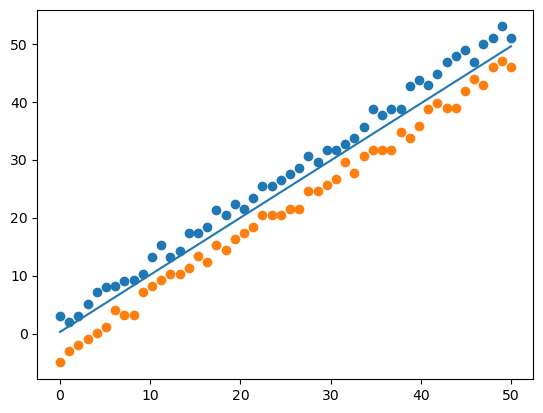

In [46]:
#计算感知机模型所算的斜率和截距
k = - (model.w[0] / model.w[1])
b = -model.b / model.w[1]
print(k)
print(b)
xx = np.linspace(0,50,50)
y = k*xx + b
plt.scatter(x,y1)
plt.scatter(x,y2)
plt.plot(xx,y)
plt.show()

In [47]:
#类定义
class people:
    #定义基本属性
    name = ''
    age = 0
    #定义私有属性,私有属性在类外部无法直接进行访问
    #定义构造方法
    def __init__(self,n,a):
        self.name = n
        self.age = a
    def speak(self):
        print("%s 说: 我 %d 岁。" %(self.name,self.age))#%s替换为字符串，%d替换为整数
# 实例化类
p = people('Python',10)
p.speak()

Python 说: 我 10 岁。
